# Sentiment Analysis- Movie reviews


__Loading Data__


In [0]:
import torch
from torchvision import datasets
import numpy as np
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
with open('/data/labels.txt') as f:
    labels= f.read()
with open('/data/reviews.txt') as f:
    reviews=f.read()
print(reviews[:200])
print(labels[:50])


bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  
positive
negative
positive
negative
positive
negat


## Data Preprocessing


In [0]:
from string import punctuation
reviews = reviews.lower() # lowercase, standardize
all_text = ''.join([c for c in reviews if c not in punctuation])
text_split = all_text.split('\n')
all_text = ' '.join(text_split)

# create a list of words
words = all_text.split()

In [4]:
from collections import Counter
counts= Counter(words)
counts.most_common(50)

[('the', 336713),
 ('and', 164107),
 ('a', 163009),
 ('of', 145864),
 ('to', 135720),
 ('is', 107328),
 ('br', 101872),
 ('it', 96352),
 ('in', 93968),
 ('i', 87623),
 ('this', 76000),
 ('that', 73245),
 ('s', 65361),
 ('was', 48208),
 ('as', 46933),
 ('for', 44343),
 ('with', 44125),
 ('movie', 44039),
 ('but', 42603),
 ('film', 40155),
 ('you', 34230),
 ('on', 34200),
 ('t', 34081),
 ('not', 30626),
 ('he', 30138),
 ('are', 29430),
 ('his', 29374),
 ('have', 27731),
 ('be', 26957),
 ('one', 26789),
 ('all', 23978),
 ('at', 23513),
 ('they', 22906),
 ('by', 22546),
 ('an', 21560),
 ('who', 21433),
 ('so', 20617),
 ('from', 20498),
 ('like', 20276),
 ('there', 18832),
 ('her', 18421),
 ('or', 18004),
 ('just', 17771),
 ('about', 17374),
 ('out', 17113),
 ('if', 16803),
 ('has', 16790),
 ('what', 16159),
 ('some', 15747),
 ('good', 15143)]

In [0]:
vocabulary= sorted(counts, key= counts.get, reverse=True)
vocab_to_int= {word: i for i,word in enumerate(vocabulary,1)}
review_ints=[]  
for review in text_split:
    review_ints.append([vocab_to_int[word] for word in review.split()])

In [6]:
print('Unique words: ', len((vocab_to_int))) 
print('Tokenized review: \n', review_ints[:1])

Unique words:  74072
Tokenized review: 
 [[21025, 308, 6, 3, 1050, 207, 8, 2138, 32, 1, 171, 57, 15, 49, 81, 5785, 44, 382, 110, 140, 15, 5194, 60, 154, 9, 1, 4975, 5852, 475, 71, 5, 260, 12, 21025, 308, 13, 1978, 6, 74, 2395, 5, 613, 73, 6, 5194, 1, 24103, 5, 1983, 10166, 1, 5786, 1499, 36, 51, 66, 204, 145, 67, 1199, 5194, 19869, 1, 37442, 4, 1, 221, 883, 31, 2988, 71, 4, 1, 5787, 10, 686, 2, 67, 1499, 54, 10, 216, 1, 383, 9, 62, 3, 1406, 3686, 783, 5, 3483, 180, 1, 382, 10, 1212, 13583, 32, 308, 3, 349, 341, 2913, 10, 143, 127, 5, 7690, 30, 4, 129, 5194, 1406, 2326, 5, 21025, 308, 10, 528, 12, 109, 1448, 4, 60, 543, 102, 12, 21025, 308, 6, 227, 4146, 48, 3, 2211, 12, 8, 215, 23]]


In [7]:
label= labels.split('\n')
label[0]

'positive'

In [0]:
pos_word=[]
neg_word=[]
for i in range(len(text_split)):
    if label[i]== 'positive':
        for word in text_split[i].split(" "):
            if word=='':
                pass
            else:
                pos_word.append(word)
    else:
        for word in text_split[i].split(" "):
            if word=='':
                pass
            else:    
                neg_word.append(word) 

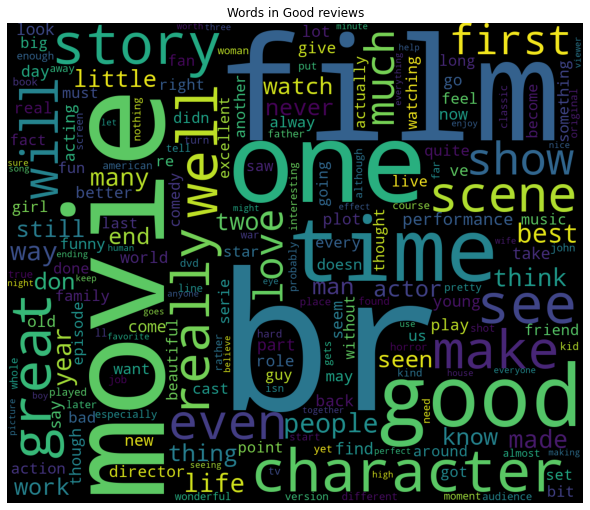

In [9]:
def nonan(x):
    if type(x) == str:
        return x.replace("\n", "")
    else:
        return ""

text = ' '.join([nonan(abstract) for abstract in pos_word])
wc = wordcloud.WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Words in Good reviews')
plt.show() 

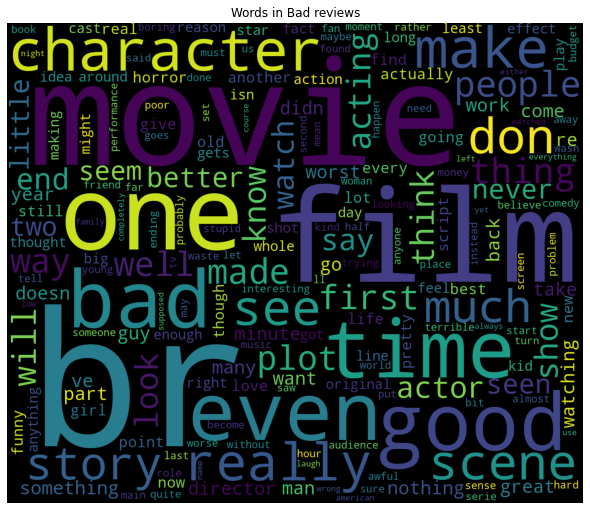

In [10]:
text = ' '.join([nonan(abstract) for abstract in neg_word])
wc = wordcloud.WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Words in Bad reviews')
plt.show() 

In [0]:
encoded_labels = np.array([1 if lab == 'positive' else 0 for lab in label])

In [12]:
encoded_labels[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [13]:
review_lens = Counter([len(x) for x in review_ints])
print("Zero-length reviews: {}".format(review_lens[0]))
print("Maximum review length: {}".format(max(review_lens)))

Zero-length reviews: 1
Maximum review length: 2514


In [14]:
print('Number of reviews before removing outliers: ', len(review_ints))
non_zero_idx = [ii for ii, review in enumerate(review_ints) if len(review) != 0]
review_ints = [review_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(review_ints))

Number of reviews before removing outliers:  25001
Number of reviews after removing outliers:  25000


In [0]:
def pad_features(reviews_ints, seq_length):
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

In [16]:
seq_length = 200

features = pad_features(review_ints, seq_length=seq_length)
assert len(features)==len(review_ints), "Your features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."
print(features[:30,:10])

[[    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [22382    42 46418    15   706 17139  3389    47    77    35]
 [ 4505   505    15     3  3342   162  8312  1652     6  4819]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [   54    10    14   116    60   798   552    71   364     5]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    1   330   578    34     3   162   748  2731     9   325]
 [    9    11 10171  5305  1946   689   444    22   280   673]
 [    0     0     0     0     0     0     0     0     0

## Loading Data


In [17]:
split_frac = 0.8
## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

Train set: 		(20000, 200) 
Validation set: 	(2500, 200) 
Test set: 		(2500, 200)


In [18]:
test_y.shape

(2500,)

In [0]:
import torch
from torch.utils.data import TensorDataset, DataLoader
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
batch_size = 50
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [20]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,     2,  3979,   224],
        [    0,     0,     0,  ...,     1,  4485,  7914],
        [    0,     0,     0,  ...,    66,     1,   647],
        ...,
        [   42,  2607,     5,  ...,  6455,   539,    10],
        [  277,     8,    14,  ...,   866,   840, 31195],
        [   10,  1037,    11,  ..., 59696, 59697,  1624]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0])


In [21]:
train_on_gpu= torch.cuda.is_available()
if train_on_gpu:
    print('GPU available')

GPU available


## LSTM Model



In [0]:
import torch.nn as nn
import torch.nn.functional as f
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, output_size, embed_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentLSTM, self).__init__()
        self.output_size= output_size
        self.n_layers= n_layers
        self.hidden_dim= hidden_dim
        
        self.embed= nn.Embedding(vocab_size, embed_dim)
        self.lstm= nn.LSTM(embed_dim, hidden_dim, num_layers= n_layers, dropout= drop_prob, batch_first=True)
        self.drop= nn.Dropout(0.3)
        self.fc= nn.Linear(hidden_dim, output_size)
        self.sig= nn.Sigmoid()
    def forward(self, x, hidden):
        batch_size=x.size(0)
        x=x.long()
        embed= self.embed(x)
        lstm_out, hidden= self.lstm(embed, hidden)
        lstm_out= lstm_out.contiguous().view(-1, self.hidden_dim)
        out= self.drop(lstm_out)
        out= self.fc(out)
        out= self.sig(out)
        out= out.view(batch_size,-1)
        out= out[:,-1]
        return out, hidden
    def init_hidden(self,batch_size):
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [23]:
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embed): Embedding(74073, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (drop): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [0]:
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


## Training

In [25]:
epochs = 4 
counter = 0
print_every = 100
clip=5
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()
        h = tuple([each.data for each in h])
        net.zero_grad()
        output, h = net(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        if counter % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())
                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.638981... Val Loss: 0.648576
Epoch: 1/4... Step: 200... Loss: 0.663653... Val Loss: 0.647599
Epoch: 1/4... Step: 300... Loss: 0.713484... Val Loss: 0.695500
Epoch: 1/4... Step: 400... Loss: 0.564124... Val Loss: 0.642446
Epoch: 2/4... Step: 600... Loss: 0.365344... Val Loss: 0.544364
Epoch: 2/4... Step: 700... Loss: 0.405283... Val Loss: 0.480841
Epoch: 2/4... Step: 800... Loss: 0.360783... Val Loss: 0.457680
Epoch: 3/4... Step: 900... Loss: 0.236698... Val Loss: 0.490029
Epoch: 3/4... Step: 1000... Loss: 0.399110... Val Loss: 0.466152
Epoch: 3/4... Step: 1100... Loss: 0.298150... Val Loss: 0.509559
Epoch: 3/4... Step: 1200... Loss: 0.262040... Val Loss: 0.457800
Epoch: 4/4... Step: 1300... Loss: 0.105647... Val Loss: 0.522900
Epoch: 4/4... Step: 1400... Loss: 0.414370... Val Loss: 0.492384
Epoch: 4/4... Step: 1500... Loss: 0.202306... Val Loss: 0.479519
Epoch: 4/4... Step: 1600... Loss: 0.176916... Val Loss: 0.496939


## Testing

In [26]:
test_losses = [] # track loss
num_correct = 0
h = net.init_hidden(batch_size)

net.eval()
for inputs, labels in test_loader:
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    output, h = net(inputs, h)
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    pred = torch.round(output.squeeze())  
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)
print("Test loss: {:.3f}".format(np.mean(test_losses)))
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.499
Test accuracy: 0.807


## Inference on custom reviews


In [0]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    test_text = ''.join([c for c in test_review if c not in punctuation])

    test_words = test_text.split()
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints


In [30]:
test_review_neg= 'Worst movie ever seen. the story was too bad and disappointing.'
test_ints = tokenize_review(test_review_neg)
print(test_ints)

[[247, 18, 124, 108, 1, 63, 14, 98, 76, 2, 1312]]


In [31]:
seq_length=200
features = pad_features(test_ints, seq_length)

print(features)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  247   18  124  108    1   

In [32]:
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())

torch.Size([1, 200])


In [0]:
def predict(net, test_review, sequence_length=200):
    
    net.eval()
    test_ints = tokenize_review(test_review)
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    output, h = net(feature_tensor, h)
    pred = torch.round(output.squeeze()) 
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")
        

In [34]:
predict(net, test_review_neg, seq_length)

Prediction value, pre-rounding: 0.007399
Negative review detected.


In [35]:
pos_test_review= 'Amazing movie. The sound and music was too good'
predict(net, pos_test_review, seq_length)

Prediction value, pre-rounding: 0.848783
Positive review detected!
